
# By Machine Learning(Decicion Tree and Linear Regression)

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import sys


In [2]:
#importing data 
A=pd.read_csv("Google_Stock_Price_Train.csv")
A

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
#converting 'object' data into 'float'
A["Close"] = A["Close"].str.replace(',', '').astype(float)
A["Volume"] = A["Volume"].str.replace(',', '').astype(float)


In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null float64
Volume    1258 non-null float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


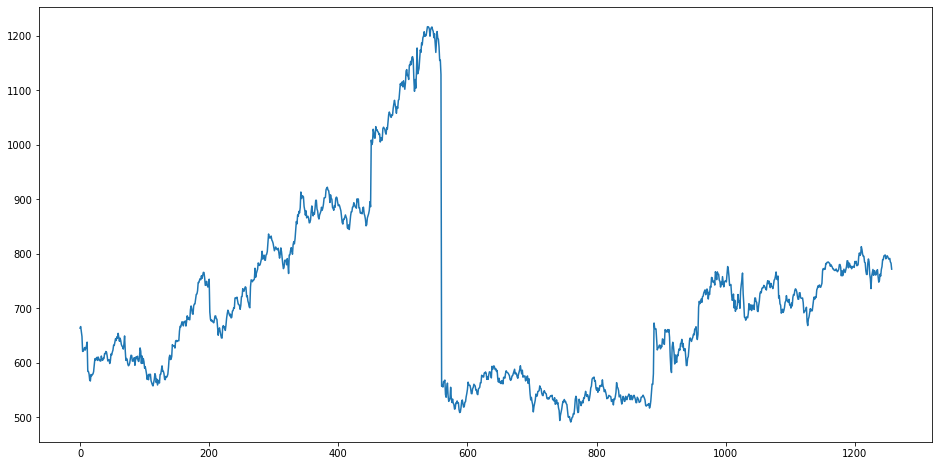

In [6]:
plt.figure(figsize=(16,8))
plt.plot(A.Close)
plt.show()

In [7]:
A=A[["Close"]]
A

,Close
0,663.59
1,666.45
2,657.21
3,648.24
4,620.76
...,...
1253,789.91
1254,791.55
1255,785.05
1256,782.79


In [8]:
#predicting on the basis of average of 30 days
future_days=30
A["Prediction"]=A.Close.shift(-future_days)
A

C:\Users\joshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Prediction
0,663.59,603.90
1,666.45,604.86
2,657.21,602.98
3,648.24,612.32
4,620.76,606.28
...,...,...
1253,789.91,NaN
1254,791.55,NaN
1255,785.05,NaN
1256,782.79,NaN


In [9]:
X=np.array(A.Close)[:-future_days]
X=X.reshape(-1,1)
X

array([[663.59],
       [666.45],
       [657.21],
       ...,
       [736.08],
       [758.49],
       [764.48]])

In [10]:
y=np.array(A.Prediction)[:-future_days]
y

array([603.9 , 604.86, 602.98, ..., 785.05, 782.79, 771.82])

In [11]:
#dividing the data into traing and testing
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=30)
ytest

array([ 538.89, 1081.69,  569.42,  776.22,  716.55,  739.45,  650.5 ,
        728.28,  567.21,  711.12,  682.4 ,  810.2 ,  750.31,  605.89,
        587.41,  608.23,  611.11,  695.16,  543.  ,  546.55,  562.76,
        584.48,  583.13,  575.78,  693.01,  886.24,  788.23,  694.45,
        741.84,  616.09,  733.78,  691.  ,  620.7 ,  641.47,  697.35,
        570.93,  639.48,  602.78,  533.57,  775.32, 1029.06, 1203.99,
        571.91,  775.42,  603.9 ,  718.85,  536.69,  613.82,  668.87,
        781.56,  827.34,  756.6 ,  635.44,  581.5 ,  751.61,  564.52,
        765.95,  552.59, 1103.89,  612.32,  512.39,  779.79,  731.29,
        537.79,  571.53,  646.83,  573.08,  705.07,  858.02,  592.71,
        587.66,  537.47,  886.36,  783.61,  877.4 ,  675.29,  771.19,
        575.66,  521.84,  563.52, 1009.01,  759.69,  822.31,  733.76,
        657.12,  577.07,  663.02,  605.6 , 1214.92,  541.07,  581.07,
        813.11,  541.52, 1066.93,  597.79,  902.76,  580.39,  698.21,
        549.33,  521

In [12]:
#future=A.drop(["Prediction"],1)[:-future_days]
#future=future.tail(future_days)
#future=np.array(future)
#future=future.reshape(-1,1)
#future

In [13]:
#using Decision tree model
tree=DecisionTreeRegressor()
model=tree.fit(xtrain,ytrain)
prediction=model.predict(xtest)
prediction

array([ 563.07 , 1075.19 ,  595.96 ,  796.1  ,  751.72 ,  784.26 ,
        665.29 ,  678.44 ,  582.89 ,  716.98 ,  779.96 ,  801.5  ,
        705.84 ,  627.21 ,  545.5  ,  600.7  ,  755.98 ,  750.   ,
        640.59 ,  538.47 ,  614.66 ,  576.36 ,  535.3  ,  580.57 ,
        706.23 ,  867.43 ,  772.73 ,  725.25 ,  780.08 ,  627.03 ,
        799.01 ,  732.66 ,  635.14 ,  586.22 ,  700.56 ,  627.03 ,
        638.23 ,  621.35 ,  543.57 ,  708.4  ,  885.27 , 1196.61 ,
        547.83 ,  739.15 ,  732.74 ,  782.22 ,  529.26 ,  686.13 ,
        764.65 ,  754.02 ,  816.82 ,  595.34 ,  721.11 ,  603.3  ,
        777.14 ,  537.46 ,  742.52 ,  525.1  , 1146.25 ,  755.98 ,
        530.8  ,  913.38 ,  767.04 ,  633.73 ,  574.5  ,  659.56 ,
        580.57 ,  699.21 ,  853.09 ,  630.59 ,  574.5  ,  556.87 ,
       1008.64 ,  779.96 ,  874.6  ,  673.69 ,  854.88 ,  573.7  ,
        535.3  ,  526.83 ,  871.26 ,  781.76 ,  857.35 ,  704.22 ,
        526.14 ,  633.73 ,  543.17 ,  621.35 , 1216.27 ,  538.

In [14]:
#creating new dataframe for comapring the results of Decision tree
Z=pd.DataFrame()
Z['ytest']=ytest
Z['pred by tree']=prediction
Z

,ytest,pred by tree
0,538.89,563.07
1,1081.69,1075.19
2,569.42,595.96
3,776.22,796.10
4,716.55,751.72
...,...,...
302,722.34,732.66
303,602.01,762.38
304,553.49,523.37
305,705.63,750.00


In [15]:
#using Linear regression model
LR=LinearRegression()
model1=LR.fit(xtrain,ytrain)
prediction1=model1.predict(xtest)
prediction1

array([ 585.93757206,  927.89362231,  634.78035584,  766.71526399,
        720.41077774,  685.12914903,  740.4484803 ,  712.89487167,
        618.34859129,  732.09825915,  757.33982518,  763.90121826,
        727.16307341,  665.30356048,  600.96938421,  653.58072673,
        670.05491408,  724.99244015,  613.55481489,  588.43344679,
        655.67358487,  630.58756911,  592.21614646,  622.6969283 ,
        733.85173489,  834.30185494,  776.14019607,  751.24508291,
        735.42137849,  619.54350016,  722.93493434,  748.77041957,
        658.48056014,  645.25878746,  737.24555889,  619.66369809,
        639.87109185,  659.2300296 ,  609.70848102,  736.67285109,
        827.05462659, 1004.05668933,  624.50696777,  711.12018453,
        681.39594263,  708.40512533,  587.43651099,  621.4878785 ,
        742.0817581 ,  761.68109172,  786.66812095,  667.26915021,
        661.39359241,  625.12916883,  703.58306705,  603.47232941,
        689.69667051,  621.96867023,  960.18444361,  670.54277

In [16]:
#creating new dataframe for comapring the results of LR
Z=pd.DataFrame()
Z['ytest']=ytest
Z['pred by LR']=prediction1
Z

,ytest,pred by LR
0,538.89,585.937572
1,1081.69,927.893622
2,569.42,634.780356
3,776.22,766.715264
4,716.55,720.410778
...,...,...
302,722.34,748.954252
303,602.01,671.242752
304,553.49,589.585933
305,705.63,725.006581


In [17]:
#creating new dataframe for comapring the results of LR and Decision tree simultaneously
Z=pd.DataFrame()
Z['ytest']=ytest
Z['pred_by_tree']=prediction
Z['pred_by_LR']=prediction1
Z

,ytest,pred_by_tree,pred_by_LR
0,538.89,563.07,585.937572
1,1081.69,1075.19,927.893622
2,569.42,595.96,634.780356
3,776.22,796.10,766.715264
4,716.55,751.72,720.410778
...,...,...,...
302,722.34,732.66,748.954252
303,602.01,762.38,671.242752
304,553.49,523.37,589.585933
305,705.63,750.00,725.006581


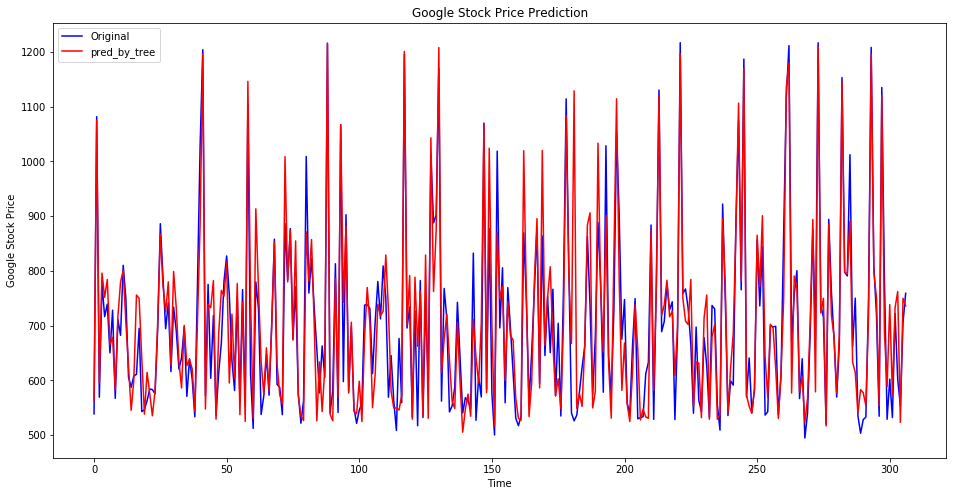

In [18]:
#plotting the results
plt.figure(figsize=(16,8))
plt.plot(Z['ytest'],c="blue")
plt.plot(Z['pred_by_tree'],c="red")
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend(["Original","pred_by_tree"])
plt.show()

# By LSTM

In [19]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [20]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)
dataset

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [21]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [23]:
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null float64
Volume    1258 non-null float64
dtypes: float64(5)
memory usage: 59.0 KB


In [25]:
# 7 day rolling mean
dataset.rolling(7).mean().head(30)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


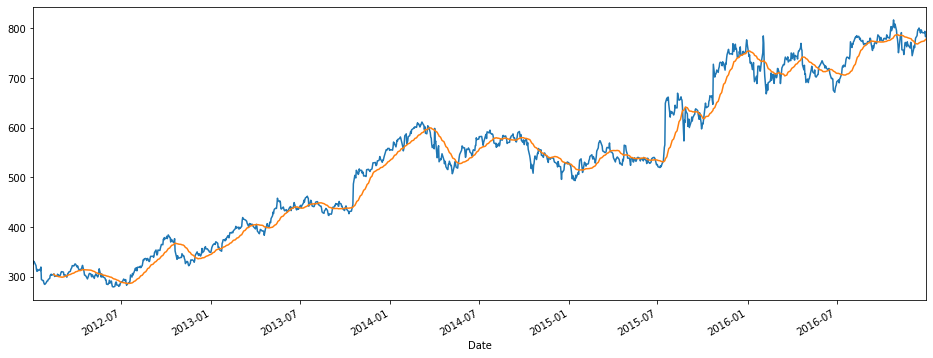

In [26]:
#plotting 'open' and and rolling mean of'open' for 30 days
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Open'].plot()

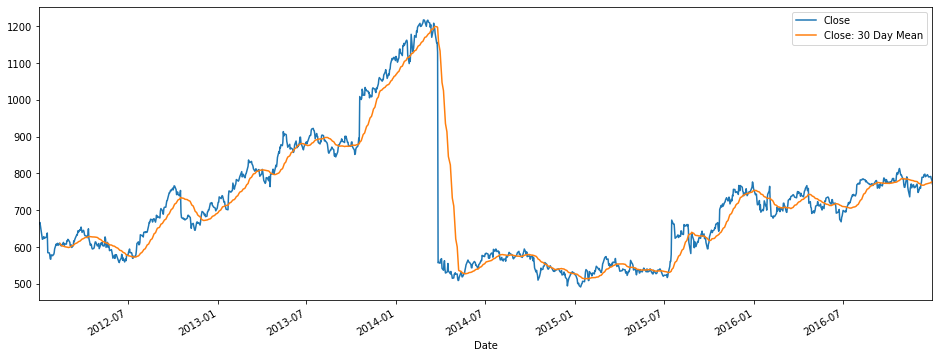

In [27]:
#plotting 'close' and and rolling mean of'close' for 30 days
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [28]:
training_set=dataset['Close']
training_set=pd.DataFrame(training_set)

In [29]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [30]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [31]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [32]:
# Initialising the RNN
regressor = Sequential()

In [33]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [34]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 4, batch_size = 32)


Epoch 1/4
38/38 [==============================] - 5s 124ms/step - loss: 0.0215
Epoch 2/4
38/38 [==============================] - 4s 115ms/step - loss: 0.0113
Epoch 3/4
38/38 [==============================] - 4s 109ms/step - loss: 0.0081
Epoch 4/4
38/38 [==============================] - 4s 117ms/step - loss: 0.0071


In [35]:

# Getting the real stock price test data of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)
dataset_test

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"
2017-01-10,807.86,809.13,803.51,804.79,"1,176,800"
2017-01-11,805.00,808.15,801.37,807.91,"1,065,900"
2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"


In [36]:
real_stock_price = dataset_test.iloc[:, 2:3].values
real_stock_price

array([[775.8 ],
       [783.16],
       [785.02],
       [792.2 ],
       [802.83],
       [803.51],
       [801.37],
       [799.17],
       [806.69],
       [800.37],
       [800.99],
       [801.8 ],
       [801.69],
       [803.74],
       [817.82],
       [825.06],
       [827.01],
       [820.44],
       [799.8 ],
       [790.52]])

In [37]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
Open      20 non-null float64
High      20 non-null float64
Low       20 non-null float64
Close     20 non-null float64
Volume    20 non-null object
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [38]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [39]:
test_set=dataset_test['Close']
test_set=pd.DataFrame(test_set)

In [40]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
Close    20 non-null float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [41]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [42]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price

,0
0,816.909790
1,817.072815
2,816.645935
3,815.821472
4,814.876343
5,814.070190
6,813.584290
7,813.539124
8,813.972351
9,814.866943


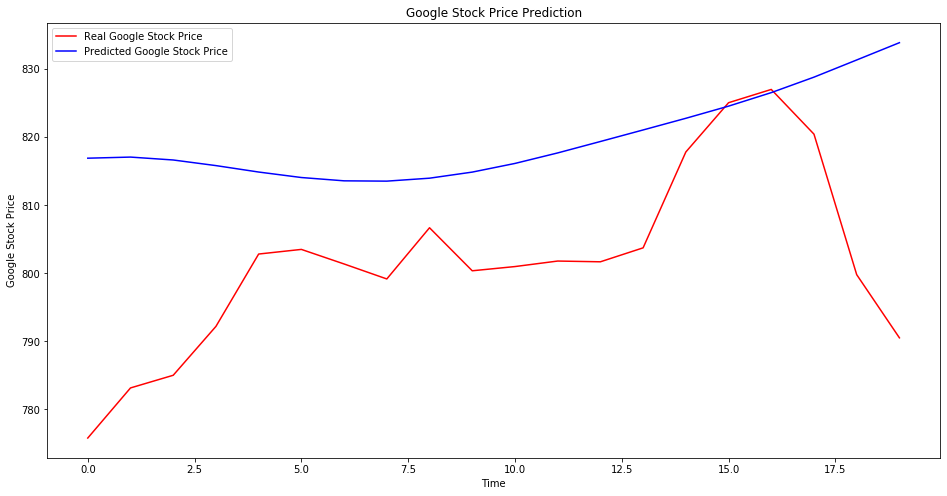

In [43]:

# Visualising the results
plt.figure(figsize=(16,8))

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
